In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset =pd.read_csv('50startups.csv')
print(dataset)

    R&D Spend  Administration  Marketing Spend     Profit
0   165349.20       136897.80        471784.10  192261.83
1   162597.70       151377.59        443898.53  191792.06
2   153441.51       101145.55        407934.54  191050.39
3   144372.41       118671.85        383199.62  182901.99
4   142107.34        91391.77        366168.42  166187.94
5   131876.90        99814.71        362861.36  156991.12
6   134615.46       147198.87        127716.82  156122.51
7   130298.13       145530.06        323876.68  155752.60
8   120542.52       148718.95        311613.29  152211.77
9   123334.88       108679.17        304981.62  149759.96
10  101913.08       110594.11        229160.95  146121.95
11  100671.96        91790.61        249744.55  144259.40
12   93863.75       127320.38        249839.44  141585.52
13   91992.39       135495.07        252664.93  134307.35
14  119943.24       156547.42        256512.92  132602.65
15  114523.61       122616.84        261776.23  129917.04
16   78013.11 

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=0)


In [107]:
X=dataset.iloc[:,:-1].values #seperating x and y columns
Y=dataset.iloc[:,-1].values
print(Y)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


In [108]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2) #we can give any degree of input
X_poly=poly.fit_transform(X_train) #transforming input into polynomial degree
X_test_poly=poly.transform(X_test)
print(X_poly)

[[1.00000000e+00 5.54939500e+04 1.03057490e+05 2.14634810e+05
  3.07957849e+09 5.71906720e+09 1.19109334e+10 1.06208462e+10
  2.21197248e+10 4.60681017e+10]
 [1.00000000e+00 4.60140200e+04 8.50474400e+04 2.05517640e+05
  2.11729004e+09 3.91337461e+09 9.45669280e+09 7.23306705e+09
  1.74787492e+10 4.22375004e+10]
 [1.00000000e+00 7.53288700e+04 1.44135980e+05 1.34050070e+05
  5.67443866e+09 1.08576005e+10 1.00978403e+10 2.07751807e+10
  1.93214382e+10 1.79694213e+10]
 [1.00000000e+00 4.64260700e+04 1.57693920e+05 2.10797670e+05
  2.15537998e+09 7.32110897e+09 9.78650738e+09 2.48673724e+10
  3.32415109e+10 4.44356577e+10]
 [1.00000000e+00 9.17491600e+04 1.14175790e+05 2.94919570e+05
  8.41790836e+09 1.04755328e+10 2.70586228e+10 1.30361110e+10
  3.36726749e+10 8.69775528e+10]
 [1.00000000e+00 1.30298130e+05 1.45530060e+05 3.23876680e+05
  1.69776027e+10 1.89622947e+10 4.22005258e+10 2.11789984e+10
  4.71337927e+10 1.04896104e+11]
 [1.00000000e+00 1.19943240e+05 1.56547420e+05 2.56512920e

In [109]:
model=LinearRegression()
model.fit(X_poly, Y_train)

LinearRegression()

In [110]:
print(model.coef_)
print(model.intercept_)  # y=a+bx+cx2+dx3 where -3.79 is x power 1

[ 0.00000000e+00  8.34739451e-01  2.61077473e-01  6.94523510e-02
 -1.85542366e-06  1.17761618e-06  1.85593442e-07 -7.54449499e-07
 -7.89862675e-07  1.59716773e-07]
25452.146381169296


In [111]:
y_pred=model.predict(X_poly)
print(y_pred)

[ 98692.96273442  90257.84338805 111339.47748595  88534.88183067
 131529.54509633 156913.51205906 145690.86957844  47162.41235267
  37426.14356165 103966.18970741 143257.26625524  98995.28213092
 101088.26188722 119001.25540685  68141.79840861 120841.59736945
  60486.64104548 149883.50906837 127759.75328954 103110.29545315
 163814.90862148 130972.80703952  73794.23610665  44958.43382568
 185964.5617631  129089.290311    86216.68683535 110147.57016186
 149433.34631638 115309.30323224  74450.54870504 119109.12015697
 121655.39276955 152266.82834783  81944.95840018  54471.13741654
 172241.72078252 192785.99970336  46972.1205961   68179.42079916]


ValueError: x and y must be the same size

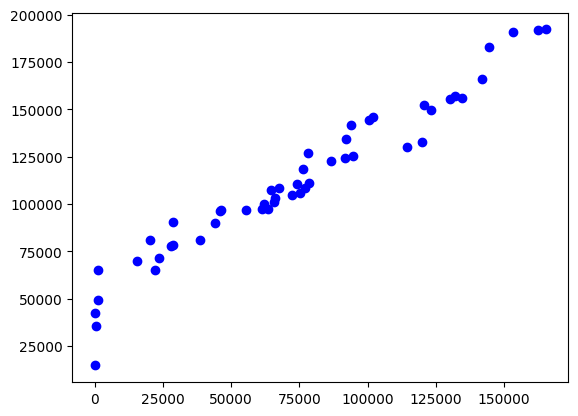

In [112]:
plt.scatter(X[ : , 0],Y,color='blue', label="Actual")  #r&d vs profit(actual)
plt.scatter(X[ : , 0], y_pred,color='orange', label="predicted") #r&d vs profit(predicted)
plt.xlabel("R&D")
plt.ylabel("Profit")
plt.title('Polynomial Regression')

plt.show()